In [4]:
# Import necessary libraries

! pip3 install spotipy
import spotipy                                          # for fetching spotify data
from spotipy.oauth2 import SpotifyClientCredentials     # for fetching spotify data
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

import time



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Spotify Credentials
CLIENT_ID = "XXXXXXXXXXXXX"  # need user valid credentials
CLIENT_SECRET = "XXXXXXXXXXXXXXXX"  # need user valid credentials

In [6]:
def fetch_tracks():

  client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)   
  sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)                                 

  # Main information 
  artist_name = []
  track_name = []
  track_popularity = []
  artist_id = []
  track_id = []

  for i in range(0, 200, 50):

    Ed_Seeran_results = sp.search(q="artist:Ed Sheeran", type='track', limit=50, offset= i)

    for t in Ed_Seeran_results['tracks']['items']:
      artist_name.append(t['artists'][0]['name'])
      track_name.append(t['name'])
      track_popularity.append(t['popularity'])
      artist_id.append(t['artists'][0]['id'])
      track_id.append(t['id'])
      
  time.sleep(1)

  for i in range(0, 200, 50):
    Iron_Maiden_results = sp.search(q="artist:Iron Maiden", type='track', limit=50, offset= i)

    for t in Iron_Maiden_results['tracks']['items']:
      artist_name.append(t['artists'][0]['name'])
      track_name.append(t['name'])
      track_popularity.append(t['popularity'])
      artist_id.append(t['artists'][0]['id'])
      track_id.append(t['id'])

  # Features of tracks
  danceability = []
  energy = []
  valence = []
  loudness = []

  for t_id in track_id:
    af = sp.audio_features(t_id)
    danceability.append(af[0]["danceability"])
    loudness.append(af[0]["loudness"])
    energy.append(af[0]["energy"])
    valence.append(af[0]["valence"])


  df = pd.DataFrame({"track_name" : track_name,"track_id" : track_id, "track_popularity" : track_popularity, "artist": artist_name,
                     "danceability": danceability, "energy": energy, "valence": valence, "loudness": loudness})
  
  # sort by Artist, Track popularity descending
  df.sort_values(by=['artist', 'track_popularity'], ascending = False, inplace = True, ignore_index= True)

  return df

In [7]:
df = fetch_tracks()

In [8]:
df

,track_name,track_id,track_popularity,artist,danceability,energy,valence,loudness
0,The Trooper - 2015 Remaster,1Ab3hhOw1TJWDgO10vlxNZ,65,Iron Maiden,0.285,0.908,0.669,-4.601
1,Run to the Hills - 2015 Remaster,0sxYYT48UPkmrDx8p4Hnrl,62,Iron Maiden,0.249,0.943,0.458,-5.188
2,The Number of the Beast - 2015 Remaster,139RwLyp7r8F9ojvhGF5lC,58,Iron Maiden,0.409,0.890,0.268,-6.839
3,Wasted Years - 2015 Remaster,2V0T2LS0pf2r3EFpOEkZFO,56,Iron Maiden,0.314,0.959,0.492,-4.657
4,2 Minutes to Midnight - 2015 Remaster,4sAjWbPq6iSI6I0Ovr9CkY,56,Iron Maiden,0.446,0.970,0.595,-5.004
...,...,...,...,...,...,...,...,...
395,Celestial,6BMuI6EQJP2CIaFQqBZRTd,0,Ed Sheeran,0.574,0.852,0.501,-1.248
396,Celestial,2mTHAWocuoLb1jt07NthVk,0,Ed Sheeran,0.574,0.852,0.501,-1.248
397,2step,6zAl2CPL9bqa8fx53ho7vh,0,Ed Sheeran,0.693,0.643,0.477,-5.867
398,Shivers,1lyBx8lQ0gvD7W3EOe7QTy,0,Ed Sheeran,0.788,0.859,0.822,-2.724


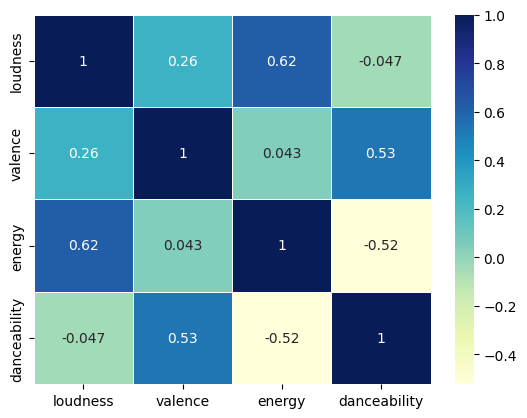

In [9]:
# Examine only the attributes of interest and construct correlation matrix

columns = ["loudness","valence","energy","danceability"]
corr = df[columns].corr()

# Create a Heatmap
sns.heatmap(corr, annot=True, linewidths=0.5,cmap="YlGnBu")
plt.show()

Overall we see that the pair "loudness"-"energy" has the highest corellation amongst all other pairs.

In [10]:
# separate the data by artist to examine the correlation matrix for each artist seperately

Iron_Maiden_data = df[df['artist'] == 'Iron Maiden'].drop(['artist','track_popularity','track_name','track_id'], axis=1)
Ed_Sheeran_data = df[df['artist'] == 'Ed Sheeran'].drop(['artist','track_popularity','track_name','track_id'], axis=1)

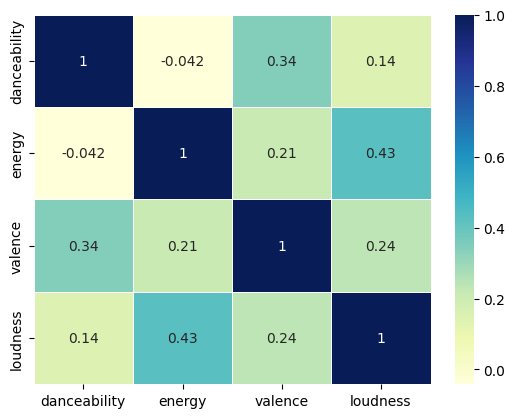

In [13]:
# Iron Maiden corellation matrix

corr_Iron_Maiden = Iron_Maiden_data.corr()

# Create a Heatmap
sns.heatmap(corr_Iron_Maiden, annot=True, linewidths=0.5,cmap="YlGnBu")
plt.show()

We observe that the pair "energy"-"loudness" has the highest corellation amongst all other pairs.

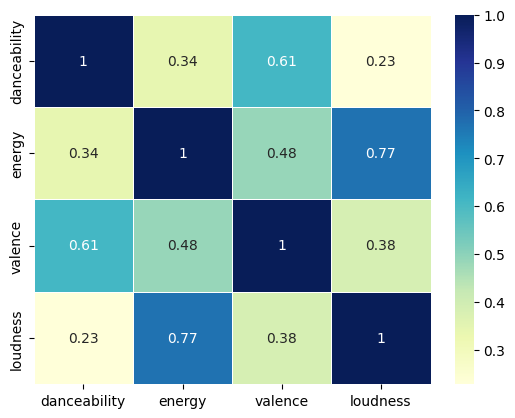

In [14]:
# Ed Sheeran corellation matrix

corr_Ed_Sheeran = Ed_Sheeran_data.corr()

# Create a Heatmap
sns.heatmap(corr_Ed_Sheeran, annot=True, linewidths=0.5,cmap="YlGnBu")
plt.show()

We observe that the pair "danceability"-"valence" has the highest corellation amongst all other pairs.

Next, we calculate the absolute difference between each artist's corellation matrix for trying to find the pair that best 'seperates' the two artists.

In [15]:

# Calculate the difference between correlation coefficients for each pair of attributes
diff = abs(corr_Ed_Sheeran - corr_Iron_Maiden)

# Find the pair of attributes with the maximum absolute difference
best_pair = diff.unstack().drop_duplicates().idxmax()

print('Best pair of attributes:', best_pair)

Best pair of attributes: ('danceability', 'energy')


In [16]:
# Standardize the features that we will use for the clustering algorithms

X = df[['danceability', 'energy']]
# Normalize X
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
# Replace the standardized values to our original DataFrame

df[['danceability', 'energy']] = X

In [18]:
df2 = df[['danceability','energy','artist']].copy()
df2

,danceability,energy,artist
0,-0.902101,0.668880,Iron Maiden
1,-1.071181,0.816785,Iron Maiden
2,-0.319714,0.592815,Iron Maiden
3,-0.765898,0.884398,Iron Maiden
4,-0.145937,0.930883,Iron Maiden
...,...,...,...
395,0.455236,0.432232,Ed Sheeran
396,0.455236,0.432232,Ed Sheeran
397,1.014140,-0.450970,Ed Sheeran
398,1.460323,0.461813,Ed Sheeran


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Accuracy: 0.9875
GMM Accuracy: 0.96


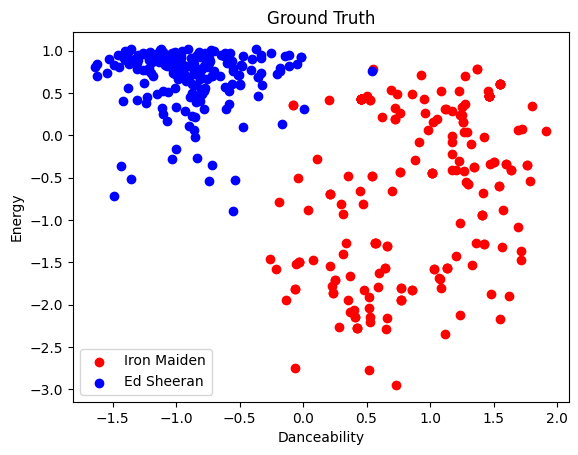

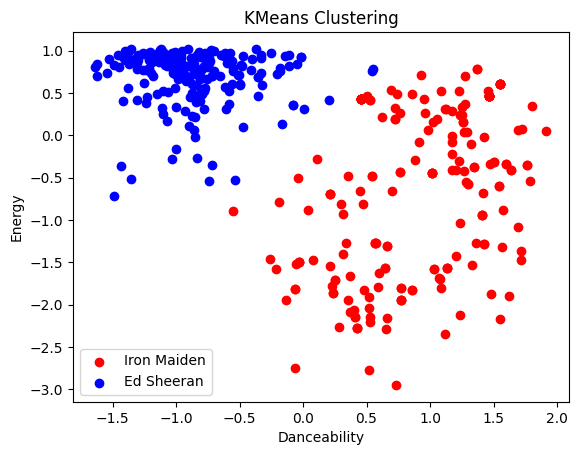

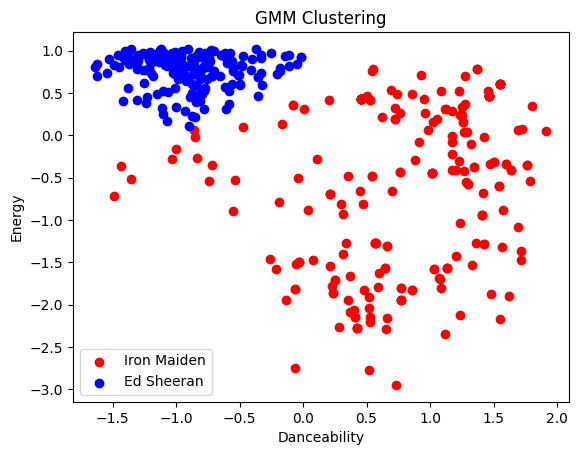

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

X = df2.iloc[:, :-1]  # keep only the columns 'Energy' and 'Danceability'

true_labels = df['artist'].replace({'Iron Maiden': 0, 'Ed Sheeran': 1})  # Replace the values to perform the clustering

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state = 7)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
kmeans_accuracy = sum(kmeans_labels == true_labels) / 400

# Perform GMM clustering
gmm = GaussianMixture(n_components=2, random_state = 7)
gmm.fit(X)
gmm_labels = gmm.predict(X)
gmm_accuracy = sum(gmm_labels == true_labels) / 400

# Print the accuracies
print('KMeans Accuracy:', kmeans_accuracy)
print('GMM Accuracy:', gmm_accuracy)

# Ground truth
plt.scatter(X['danceability'][true_labels == 1], X['energy'][true_labels == 1], color='red', label='Iron Maiden')  
plt.scatter(X['danceability'][true_labels == 0], X['energy'][true_labels == 0], color='blue', label='Ed Sheeran')
plt.title('Ground Truth')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend()
plt.show()

# KMeans clustering
plt.scatter(X['danceability'][kmeans_labels == 1], X['energy'][kmeans_labels == 1], color='red', label='Iron Maiden')  
plt.scatter(X['danceability'][kmeans_labels == 0], X['energy'][kmeans_labels == 0], color='blue', label='Ed Sheeran')
plt.title('KMeans Clustering')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend()
plt.show()

# GMM clustering
plt.scatter(X['danceability'][gmm_labels == 1], X['energy'][gmm_labels == 1], color='red', label='Iron Maiden')
plt.scatter(X['danceability'][gmm_labels == 0], X['energy'][gmm_labels == 0], color='blue', label='Ed Sheeran')
plt.title('GMM Clustering')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [21]:
# Print the accuracies
print('KMeans Accuracy:', kmeans_accuracy)
print('GMM Accuracy:', gmm_accuracy)

KMeans Accuracy: 0.9875
GMM Accuracy: 0.96


From the above scatter plots and the accuracy of the models, we observe that the pair 'energy'-'danceability' was a highly effective way for clustering the two artists returning 98.7% accuracy for the KMeans model, and 96% for the GMM.